### Importing libraries needed for Unsupervised Learning

In [1]:
import numpy as np
import os
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn_extra.cluster import KMedoids
from sklearn.metrics import silhouette_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
negative_data = pd.read_csv('negative.csv')


In [3]:
negative_data.head()


,# mean_0_a,mean_1_a,mean_2_a,mean_3_a,mean_4_a,mean_d_0_a,mean_d_1_a,mean_d_2_a,mean_d_3_a,mean_d_4_a,...,fft_741_b,fft_742_b,fft_743_b,fft_744_b,fft_745_b,fft_746_b,fft_747_b,fft_748_b,fft_749_b,label
0,4.62,30.3,-356.00,15.60,26.3,1.07,0.411,-15.70,2.06,3.150,...,23.50,20.3,20.3,23.50,-215.00,280.0,-162.0,-162.0,280.0,NEGATIVE
1,17.80,27.8,-102.00,16.90,26.9,-3.21,-1.950,9.80,-3.24,-0.955,...,-177.00,32.8,32.8,-177.00,-417.00,384.0,-186.0,-186.0,384.0,NEGATIVE
2,8.91,29.2,-314.00,6.51,30.9,-1.88,1.900,11.90,-3.60,5.700,...,226.00,-81.8,-81.8,226.00,1.84,99.4,-40.3,-40.3,99.4,NEGATIVE
3,13.30,30.4,-149.00,11.80,28.3,3.03,0.895,-4.52,1.72,-0.633,...,6.11,20.0,20.0,6.11,-53.00,176.0,-167.0,-167.0,176.0,NEGATIVE
4,19.30,31.7,-4.56,23.80,32.9,-3.41,0.677,46.60,6.80,3.890,...,244.00,-144.0,-144.0,244.00,18.50,-14.8,10.3,10.3,-14.8,NEGATIVE


In [31]:
negative_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 708 entries, 0 to 707
Columns: 2549 entries, # mean_0_a to label
dtypes: float64(2548), object(1)
memory usage: 13.8+ MB


In [7]:
negative = negative_data.drop(columns=['label'])

### Standardize the data

In [10]:
scaler = StandardScaler()
negative_scaled = scaler.fit_transform(negative)

### Dimentionality Reduction

In [13]:
pca = PCA()
pca.fit(negative_scaled)
data_pca = pca.transform(negative_scaled)

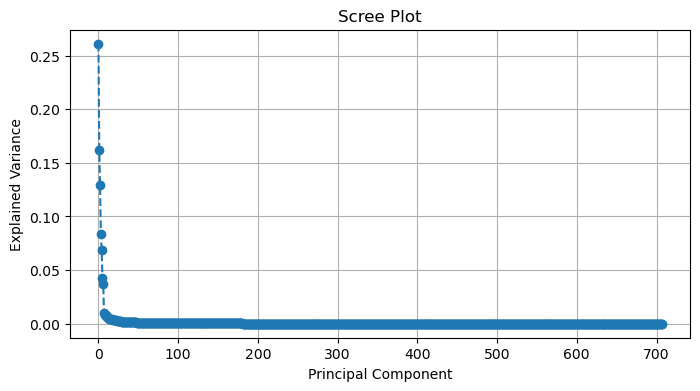

In [17]:
# Scree plot
plt.figure(figsize=(8, 4))
plt.plot(pca.explained_variance_ratio_, marker='o', linestyle='--')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance')
plt.grid(True)
plt.show()

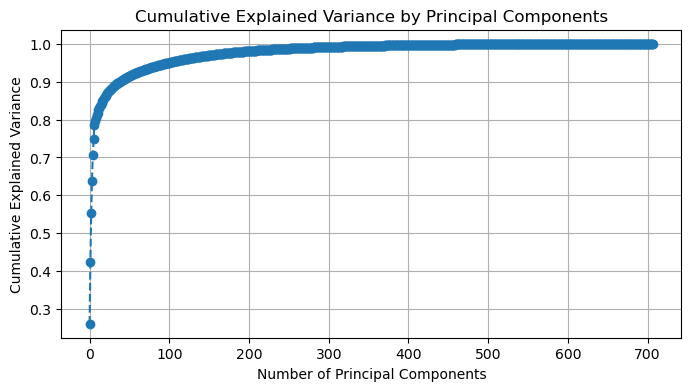

In [19]:
# Plot the explained variance
plt.figure(figsize=(8, 4))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--')
plt.title('Cumulative Explained Variance by Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

In [15]:
# Apply PCA
n_components = 2  # You can adjust the number of components as needed
pca = PCA(n_components=n_components)

# Fit and transform the data
negative_pca = pca.fit_transform(negative_scaled)

# Create a DataFrame with the PCA components
pca_columns = [f'PC{i+1}' for i in range(n_components)]
negative_pca_df = pd.DataFrame(negative_pca, columns=pca_columns)

# Inspect the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
print(f"Explained variance ratio by each component: {explained_variance_ratio}")
print(f"Cumulative explained variance ratio: {np.cumsum(explained_variance_ratio)}")

# Show the DataFrame with PCA components
print(negative_pca_df.head())

Explained variance ratio by each component: [0.26113021 0.16228194]
Cumulative explained variance ratio: [0.26113021 0.42341215]
         PC1        PC2
0  -3.860352  -7.572855
1  22.207870   2.624527
2  -0.535370 -11.849649
3  18.912066  -3.286446
4  36.713127  29.282152


### Apply K-means clustering

### K-means with silhouette score

In [17]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Initialize variables for tracking best results
best_kmeans = None
best_silhouette = -1  # Initialize with the lowest possible silhouette score

# Perform multiple initializations of K-means clustering
n_init = 100  # Number of initializations
for i in range(n_init):
    kmeans = KMeans(n_clusters=4, random_state=i)
    kmeans.fit(negative_pca)
    
    # Calculate silhouette score for the current clustering
    labels = kmeans.labels_
    silhouette_avg = silhouette_score(negative_pca, labels)
    
    # Update best results if the current silhouette score is better
    if silhouette_avg > best_silhouette:
        best_silhouette = silhouette_avg
        best_kmeans = kmeans

# Get the best clustering results based on silhouette score
cluster_labels = best_kmeans.labels_

# Output the best silhouette score for reference
print(f"Best Silhouette Score: {best_silhouette}")


C:\Users\MadaraMendis\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\MadaraMendis\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\MadaraMendis\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\MadaraMendis\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to 

Best Silhouette Score: 0.5070844947305942


C:\Users\MadaraMendis\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


### K-Means with inertia

In [25]:
# Initialize variables for tracking best results
best_kmeans = None
best_inertia = float('inf')  # Initialize with a large value

# Perform multiple initializations of K-means clustering as The K-means algorithm is sensitive to the initial positions of the centroids. 
n_init = 100  # Number of initializations
for i in range(n_init):
    kmeans = KMeans(n_clusters=4, random_state=i)
    kmeans.fit(negative_pca)
    
    # Calculate inertia (distortion) and update best results if better
    inertia = kmeans.inertia_ #Inertia is the sum of squared distances between each data point and the nearest cluster center. The lower the inertia, the more compact the clusters are.
    if inertia < best_inertia:
        best_inertia = inertia
        best_kmeans = kmeans

# Get the best clustering results
cluster_labels = best_kmeans.labels_

C:\Users\MadaraMendis\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\MadaraMendis\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\MadaraMendis\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\MadaraMendis\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to 

os.environ['OMP_NUM_THREADS'] = '3'  # Set to 3 threads (or another value)

In [19]:
# Add cluster labels to the original DataFrame
negative_pca_df = pd.DataFrame(negative_pca, columns=[f'PC{i+1}' for i in range(n_components)])
negative_pca_df['Cluster'] = cluster_labels


### Visualization of Clusters

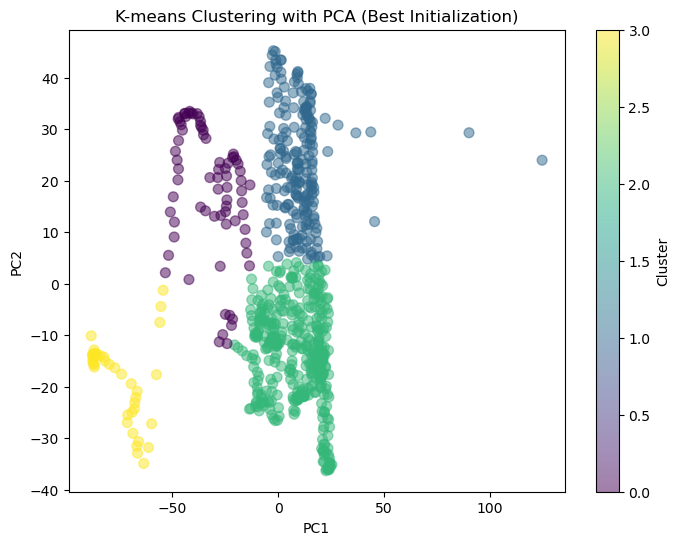

In [21]:
plt.figure(figsize=(8, 6))
plt.scatter(negative_pca_df['PC1'], negative_pca_df['PC2'], c=negative_pca_df['Cluster'], cmap='viridis', s=50, alpha=0.5)
plt.title('K-means Clustering with PCA (Best Initialization)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.colorbar(label='Cluster')
plt.show()


### PAM with inertia

In [23]:
# Initialize variables for tracking best results
best_kmedoids = None
best_inertia = float('inf')  # Initialize with a large value

# Perform multiple initializations of K-Medoids clustering
n_init = 100  # Number of initializations
for i in range(n_init):
    # Initialize K-Medoids with a specific number of clusters
    kmedoids = KMedoids(n_clusters=4, random_state=i, method='pam')
    
    # Fit the K-Medoids model to the PCA-transformed data
    kmedoids.fit(negative_pca)
    
    # Calculate inertia (sum of squared distances to medoids)
    inertia = np.sum(np.min(kmedoids.transform(negative_pca), axis=1))
    
    # Update best results if the current inertia is better
    if inertia < best_inertia:
        best_inertia = inertia
        best_kmedoids = kmedoids

# Get the best clustering results
cluster_labels = best_kmedoids.labels_
medoids = best_kmedoids.cluster_centers_

print(f"Best inertia: {best_inertia}")
print(f"Cluster labels: {cluster_labels}")
print(f"Medoids: {medoids}")

Best inertia: 9441.125198725354
Cluster labels: [3 2 3 2 0 0 1 3 2 2 3 3 3 0 2 0 2 0 2 3 0 1 2 1 0 0 0 0 2 0 2 1 0 2 0 0 2
 0 2 0 2 2 3 0 3 2 3 3 2 2 0 3 0 3 2 2 2 0 2 2 2 3 2 0 0 1 1 0 2 2 2 1 0 3
 3 3 2 0 2 3 2 0 2 0 1 2 0 0 0 2 3 0 2 0 2 2 0 3 0 2 0 0 2 0 0 0 2 2 2 2 2
 3 3 2 3 3 3 3 0 2 2 0 3 2 3 2 0 0 3 3 2 2 1 3 3 0 2 0 2 3 0 2 1 2 3 2 3 1
 1 3 2 2 0 3 3 2 1 2 0 3 3 3 0 3 0 2 2 0 2 0 3 3 2 1 2 2 3 0 0 0 3 1 2 2 0
 1 0 2 2 2 3 3 3 1 0 2 2 2 2 2 0 0 3 2 3 0 2 3 2 0 1 0 3 3 3 0 3 0 3 0 2 0
 0 2 0 0 3 1 2 2 2 0 3 3 2 2 3 2 2 2 0 3 0 1 2 0 0 0 0 0 2 2 0 2 0 3 0 0 0
 2 1 2 0 3 2 3 3 1 2 2 3 1 0 0 0 2 0 1 3 0 3 3 3 3 0 2 0 3 3 0 0 0 2 0 3 3
 0 0 0 2 2 0 0 0 3 2 2 0 3 0 2 3 2 3 2 3 3 2 0 0 2 2 0 0 3 0 2 3 3 2 0 0 0
 0 2 2 0 1 0 0 3 2 3 0 3 0 2 2 3 3 0 0 1 2 2 0 0 2 2 3 2 0 0 0 3 0 0 0 0 3
 3 3 3 1 3 0 3 3 2 0 3 0 1 2 3 2 2 3 0 2 3 0 0 0 1 2 3 1 3 2 0 1 3 0 3 2 3
 2 0 3 0 2 3 0 0 0 3 2 3 0 0 2 3 2 0 3 0 3 3 2 2 2 0 3 0 2 1 3 0 2 0 0 3 0
 3 0 3 3 1 0 1 1 2 0 0 1 0 3 2 2 0 0 0 3 3 2 0 3 2 0

In [25]:
# Calculate the silhouette score
silhouette_avg = silhouette_score(negative_pca, cluster_labels)

# Output the silhouette score
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.4184328948993654


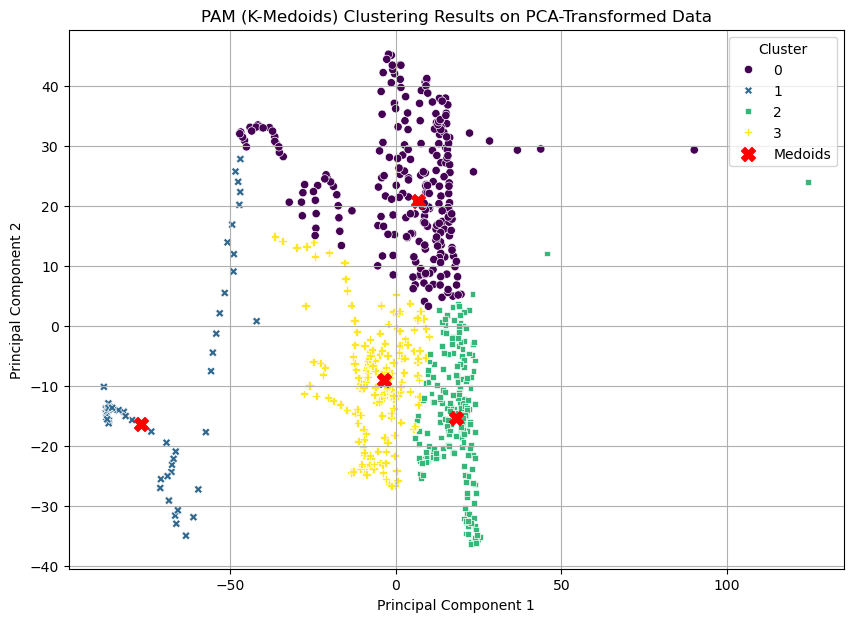

In [19]:
# Plotting
plt.figure(figsize=(10, 7))
sns.scatterplot(
    data=negative_pca_df, 
    x='PC1', 
    y='PC2', 
    hue='Cluster', 
    palette='viridis', 
    style='Cluster', 
    markers=True
)

# Marking the medoids in the plot
medoid_points = pd.DataFrame(medoids, columns=[f'PC{i+1}' for i in range(n_components)])
plt.scatter(medoid_points['PC1'], medoid_points['PC2'], color='red', marker='X', s=100, label='Medoids')

plt.title('PAM (K-Medoids) Clustering Results on PCA-Transformed Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

### PAM with silhouette score

In [27]:
from sklearn.metrics import silhouette_score
from sklearn_extra.cluster import KMedoids
import numpy as np

# Initialize variables for tracking best results
best_kmedoids = None
best_silhouette = -1  # Initialize with the lowest possible silhouette score

# Perform multiple initializations of K-Medoids clustering
n_init = 100  # Number of initializations
for i in range(n_init):
    # Initialize K-Medoids with a specific number of clusters
    kmedoids = KMedoids(n_clusters=4, random_state=i, method='pam')
    
    # Fit the K-Medoids model to the PCA-transformed data
    kmedoids.fit(negative_pca)
    
    # Get the cluster labels
    cluster_labels = kmedoids.labels_
    
    # Calculate the silhouette score for the current clustering
    silhouette_avg = silhouette_score(negative_pca, cluster_labels)
    
    # Update best results if the current silhouette score is better
    if silhouette_avg > best_silhouette:
        best_silhouette = silhouette_avg
        best_kmedoids = kmedoids

# Get the best clustering results
cluster_labels = best_kmedoids.labels_
medoids = best_kmedoids.cluster_centers_

# Output the best silhouette score and clustering details
print(f"Best Silhouette Score: {best_silhouette}")
print(f"Cluster labels: {cluster_labels}")
print(f"Medoids: {medoids}")


Best Silhouette Score: 0.4184328948993654
Cluster labels: [3 2 3 2 0 0 1 3 2 2 3 3 3 0 2 0 2 0 2 3 0 1 2 1 0 0 0 0 2 0 2 1 0 2 0 0 2
 0 2 0 2 2 3 0 3 2 3 3 2 2 0 3 0 3 2 2 2 0 2 2 2 3 2 0 0 1 1 0 2 2 2 1 0 3
 3 3 2 0 2 3 2 0 2 0 1 2 0 0 0 2 3 0 2 0 2 2 0 3 0 2 0 0 2 0 0 0 2 2 2 2 2
 3 3 2 3 3 3 3 0 2 2 0 3 2 3 2 0 0 3 3 2 2 1 3 3 0 2 0 2 3 0 2 1 2 3 2 3 1
 1 3 2 2 0 3 3 2 1 2 0 3 3 3 0 3 0 2 2 0 2 0 3 3 2 1 2 2 3 0 0 0 3 1 2 2 0
 1 0 2 2 2 3 3 3 1 0 2 2 2 2 2 0 0 3 2 3 0 2 3 2 0 1 0 3 3 3 0 3 0 3 0 2 0
 0 2 0 0 3 1 2 2 2 0 3 3 2 2 3 2 2 2 0 3 0 1 2 0 0 0 0 0 2 2 0 2 0 3 0 0 0
 2 1 2 0 3 2 3 3 1 2 2 3 1 0 0 0 2 0 1 3 0 3 3 3 3 0 2 0 3 3 0 0 0 2 0 3 3
 0 0 0 2 2 0 0 0 3 2 2 0 3 0 2 3 2 3 2 3 3 2 0 0 2 2 0 0 3 0 2 3 3 2 0 0 0
 0 2 2 0 1 0 0 3 2 3 0 3 0 2 2 3 3 0 0 1 2 2 0 0 2 2 3 2 0 0 0 3 0 0 0 0 3
 3 3 3 1 3 0 3 3 2 0 3 0 1 2 3 2 2 3 0 2 3 0 0 0 1 2 3 1 3 2 0 1 3 0 3 2 3
 2 0 3 0 2 3 0 0 0 3 2 3 0 0 2 3 2 0 3 0 3 3 2 2 2 0 3 0 2 1 3 0 2 0 0 3 0
 3 0 3 3 1 0 1 1 2 0 0 1 0 3 2 2 0 0 0 3 3

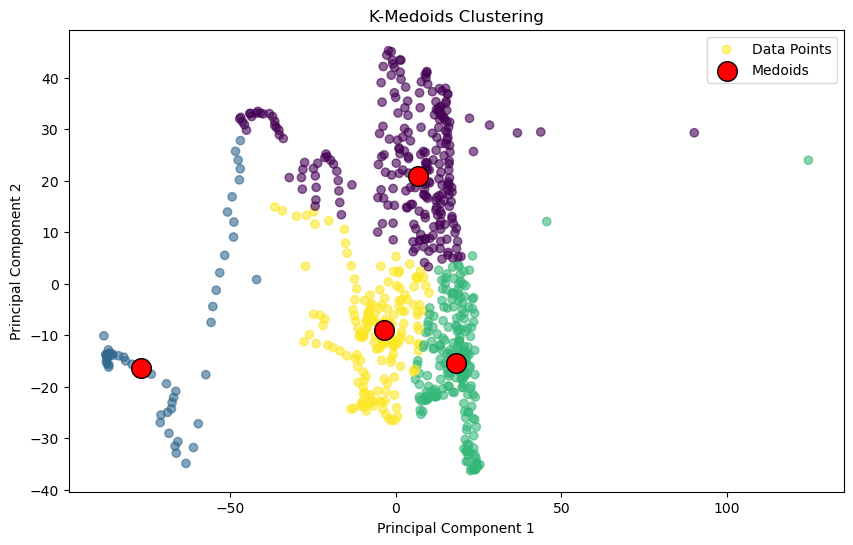

In [29]:
# Scatter plot of the data points colored by cluster labels
plt.figure(figsize=(10, 6))
plt.scatter(negative_pca[:, 0], negative_pca[:, 1], c=cluster_labels, cmap='viridis', alpha=0.6, label='Data Points')

# Highlight medoids with a different marker
plt.scatter(medoids[:, 0], medoids[:, 1], marker='o', c='red', s=200, edgecolor='k', label='Medoids')

# Add plot title and labels
plt.title('K-Medoids Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()